# Episode 02: Is this Data Science?

### MovieStatsFlow loads the movie metadata CSV file into a Pandas Dataframe and computes some movie genre specific statistics. You can use this notebook and the Metaflow client to eyeball the results and make some simple plots. 

## Import the metaflow client

In [3]:
from metaflow import Flow, get_metadata
import matplotlib.pyplot as plt
print("Current metadata provider: %s" % get_metadata())

Current metadata provider: local@/workspace/data-centric-deep-learning/course/week2/metaflow-tutorials


In [6]:
!python stats.py run

Metaflow 2.6.0 executing MovieStatsFlow for user:gitpod
Validating your flow...
    The graph looks good!
Running pylint...
    Pylint is happy!
Including file movies.csv of size 191KB 
File persisted at local:///workspace/data-centric-deep-learning/course/week2/metaflow-tutorials/.metaflow/data/MovieStatsFlow/9e3a38eb45be19331cf19b394d8191f54a06a281
2023-09-29 15:54:13.010 Workflow starting (run-id 1696002852999621):
2023-09-29 15:54:13.024 [1696002852999621/start/1 (pid 3855)] Task is starting.
2023-09-29 15:54:14.027 [1696002852999621/start/1 (pid 3855)] Foreach yields 22 child steps.
2023-09-29 15:54:14.027 [1696002852999621/start/1 (pid 3855)] Task finished successfully.
2023-09-29 15:54:14.040 [1696002852999621/compute_statistics/2 (pid 3874)] Task is starting.
2023-09-29 15:54:14.048 [1696002852999621/compute_statistics/3 (pid 3875)] Task is starting.
2023-09-29 15:54:14.062 [1696002852999621/compute_statistics/4 (pid 3876)] Task is starting.
2023-09-29 15:54:14.075 [16960028529

## Get the movie statistics from the latest run of MovieStatsFlow

In [7]:
run = Flow('MovieStatsFlow').latest_successful_run
print("Using run: %s" % str(run))

genre_stats = run.data.genre_stats

Using run: Run('MovieStatsFlow/1696002852999621')


## Create a bar plot of the median gross box office for the top-5 grossing genres

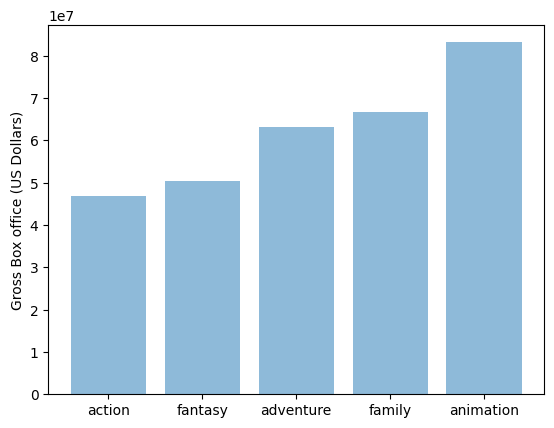

In [8]:
# Get median for each genre
data = [(genre, data['quartiles'][1]) \
        for genre, data \
        in genre_stats.items()]

# Sort and unpack into a list of labels, and medians
genre, median = zip(*[(genre, median)\
                      for genre, median\
                      in sorted(data, key=lambda pair: pair[1])])

# Create the bar plot
plt.bar(genre[-5:], median[-5:], align='center', alpha=0.5)
plt.ylabel("Gross Box office (US Dollars)")
plt.show()